[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shaivimalik/medicine_preprocessing-on-entire-dataset/blob/1f2f08c21295dc32983903be8ea24154fffe0b7a/notebooks/01.ipynb)

# Introduction

In this notebook, we will reproduce the results published in
**Characterization of Term and Preterm Deliveries using
Electrohysterograms Signatures**. Preterm birth occurs when a baby is
born before 37 weeks of pregnancy. It is the leading cause of death in
children under the age of five and is responsible for 35% of all newborn
deaths. In 2020, an estimated 13.4 million babies were born prematurely,
representing more than 1 in 10 births worldwide. The consequences of
preterm birth are severe, with approximately 900,000 children dying in
2019 due to related complications. Many survivors face lifelong
disabilities, including learning difficulties and visual and hearing
problems[1].

The main challenge in addressing preterm births is the delay in
obtaining clinical proof, which can lead to increased labor
complications and perinatal mortality[2]. Early prediction of preterm
birth is crucial to prevent these deaths and complications. Once
identified, healthcare providers can take essential measures to ensure
extra care for the mother during labor and for the newborn baby. Recent
advancements in machine learning and deep learning have opened doors for
novel approaches to classify between term and preterm deliveries. These
powerful tools hold immense promise for improving our ability to
identify pregnancies at risk. This notebook aims to reproduce the
results of one such study exploring the use of electrohysterograms
signatures (EHG) to characterize term and preterm deliveries.

### Objectives

-   Understand the methodology used in the original paper.
-   Implement the described algorithms and techniques.
-   Analyze and compare our results with those published in the paper.
-   Discuss potential improvements for future research.

------------------------------------------------------------------------

[1] [WHO, “Preterm birth,”
2018.](https://www.who.int/news-room/fact-sheets/detail/preterm-birth)

[2] M. U. Khan, S. Aziz, S. Ibraheem, A. Butt and H. Shahid,
“Characterization of Term and Preterm Deliveries using
Electrohysterograms Signatures,” 2019 IEEE 10th Annual Information
Technology, Electronics and Mobile Communication Conference (IEMCON),
Vancouver, BC, Canada, 2019, pp. 0899-0905, doi:
10.1109/IEMCON.2019.893629

# Retrieve the data

The **Term-Preterm EHG Database**[1] is a collection of EHG signals
obtained from 1997 to 2005 at the University Medical Centre Ljubljana,
Department of Obstetrics and Gynecology. Electrohysterograms signature
is obtained by placing four electrodes on the abdomen of the mother. It
is a non-invasive method to measure the electrical activity of the
uterine muscle. The records were obtained during regular check-ups
either around the 22nd week of gestation or around the 32nd week of
gestation.

The TPEGH DB consists of EHG records obtained from 262 women who had
full-term pregnancies and 38 whose pregnancies ended prematurely. Each
record is composed of three channels, recorded from 4 electrodes:

-   the first electrode (E1) was placed 3.5 cm to the left and 3.5 cm
    above the navel;
-   the second electrode (E2) was placed 3.5 cm to the right and 3.5 cm
    above the navel;
-   the third electrode (E3) was placed 3.5 cm to the right and 3.5 cm
    below the navel;
-   the fourth electrode (E4) was placed 3.5 cm to the left and 3.5 cm
    below the navel.

The differences in the electrical potentials of the electrodes were
recorded, producing 3 channels:

-   S1 = E2–E1 (first channel);
-   S2 = E2–E3 (second channel);
-   S3 = E4–E3 (third channel).

Each record consists of two files, a header file (.hea) containing
information regarding the record and the data file (.dat) containing
signal data[2].

We’ll begin by acquiring the TPEGH DB (Term-Preterm ElectroHysteroGram
Database) and extracting relevant features for our model training. The
following cell will:

-   Clone the project repository
-   Download the TPEGH DB dataset
-   Install required dependencies

Note that the download may take some time depending on your internet
connection speed.

------------------------------------------------------------------------

[1] Fele-Žorž, G., Kavšek, G., Novak-Antolič, Ž. et al. A comparison of
various linear and non-linear signal processing techniques to separate
uterine EMG records of term and pre-term delivery groups. Med Biol Eng
Comput 46, 911–922 (2008). https://doi.org/10.1007/s11517-008-0350-y

[2] Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C.,
Mark, R., … & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and
PhysioNet: Components of a new research resource for complex physiologic
signals. Circulation \[Online\]. 101 (23), pp. e215–e220.

In [ ]:
!git clone https://github.com/shaivimalik/medicine_preprocessing-on-entire-dataset.git
%cd medicine_preprocessing-on-entire-dataset
!pip install -r requirements.txt
!curl -O https://physionet.org/static/published-projects/tpehgdb/term-preterm-ehg-database-1.0.1.zip
!unzip term-preterm-ehg-database-1.0.1.zip

# Reproducing the result of “Characterization of Term and Preterm Deliveries using Electrohysterograms Signatures”

**Characterization of Term and Preterm Deliveries using
Electrohysterograms Signatures**[1] presents a method for preterm birth
prediction using classifiers trained on Electrohysterogram signatures.
In this study, four features were extracted from EHG signatures:
**Median frequency, Shannon energy, Log energy and Lyapunov exponent**.
These features were used to distinguish between term and preterm births.

However, the TPEGH database presents a challenge: class imbalance. It
contains a significantly higher number of term birth records (262)
compared to preterm births (38). To address the class imbalance issue,
the study employed the Adaptive Synthetic Sampling technique. This
method generates synthetic samples for the minority class to create a
more balanced dataset.

Using these features, various machine learning models were trained,
including different types of Support Vector Machines (Linear, Quadratic,
Cubic, Fine Gaussian, Medium Gaussian), Decision Trees, and K-Nearest
Neighbor (Medium and Cubic) classifiers. 10-fold cross validation was
used to to assess the performance of these models, reporting accuracy,
sensitivity, specificity, and error scores for each.

| 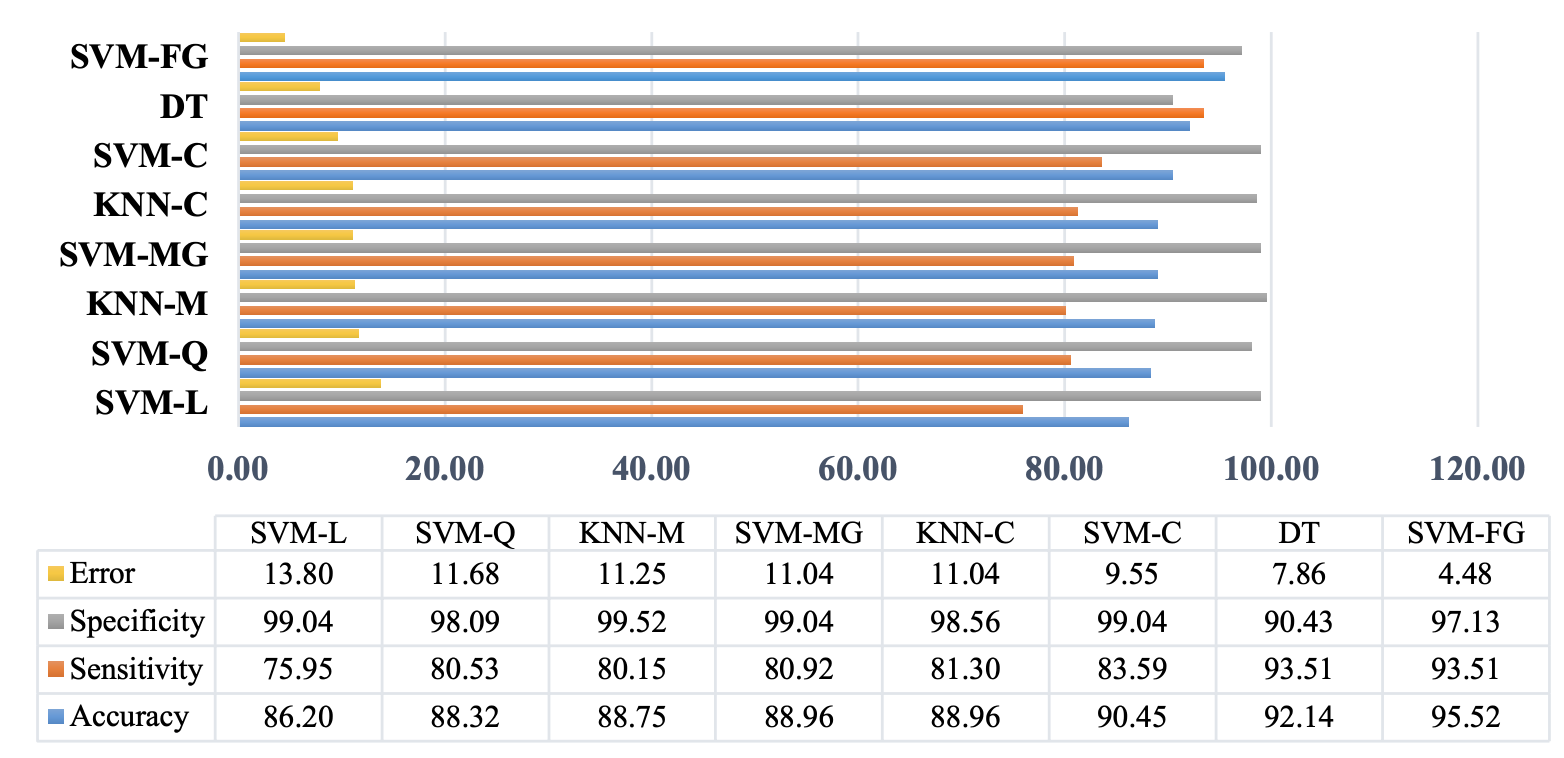 |
|:----------------------------------------------------------------------:|
| *figure from the original paper which compares the performance of different classifiers on the TPEHG database* |

In this notebook, we will reproduce the model with the highest reported
accuracy: the **Support Vector Machine (SVM) with the radial basis
function (RBF) kernel (SVM-FG)**. We will train the SVM-FG model and
evaluate its performance using the same metrics reported in the paper:
accuracy, error, sensitivity, and specificity. The model achieved the
following performance metrics as reported in the paper:

|   Metric    | Score |
|:-----------:|:-----:|
|  Accuracy   | 95.5% |
|    Error    | 4.48  |
| Specificity | 97.13 |
| Sensitivity | 93.51 |

Overview of the sections:

-   [Generate Features](#generate-features): We’ll discuss the
    techniques used to extract features from raw EHG signals.

-   [Addressing Class Imbalance](#addressing-class-imbalance): We’ll
    discuss the ADASYN oversampling technique and its role in balancing
    the dataset.

-   [SVM Classifier Training and
    Evaluation](#svm-classifier-training-and-evaluation): We’ll
    implement the process of training the SVM (Support Vector Machine)
    model with the extracted features and its evaluation using 10-fold
    cross-validation.

-   [Discussion](#discussion): Finally, we’ll present and interpret the
    results obtained from the model.

------------------------------------------------------------------------

[1] M. U. Khan, S. Aziz, S. Ibraheem, A. Butt and H. Shahid,
“Characterization of Term and Preterm Deliveries using
Electrohysterograms Signatures,” 2019 IEEE 10th Annual Information
Technology, Electronics and Mobile Communication Conference (IEMCON),
Vancouver, BC, Canada, 2019, pp. 0899-0905, doi:
10.1109/IEMCON.2019.893629

# Generate Features

We will extract features from raw electrohysterogram signatures. Raw EHG
signals are corrupted due to the presence of noise and artifacts
(identifiable disturbances that are not part of the genuine
physiological signal). To remove the noise and artifacts and isolate the
region of interest, Empirical Mode Decomposition technique was leveraged
in the study. EMD decomposes each signal into a series of signal
components called Intrinsic Mode Functions (IMFs). IMFs represent
different oscillatory modes present in the signal, each with its own
amplitude and frequency modulation. The first IMF was identified as the
region of interest in the paper.

We will use Empirical Mode Decomposition to extract Intrinsic Mode
Functions. Next, we will compute Median frequency, Shannon energy, Log
energy and Lyapunov exponent from IMF-1. These computed features will be
used for training our model.

The code cell below automates this process. It creates a directory named
`individual_features` to store the feature files for each signal. Then,
it executes two Python scripts:

-   `all_features.py`: generates the individual feature files for each
    signal.

-   `process_feature_files.py`: combines the individual feature files
    into a single dataset containing features from all 298 EHG
    signatures.

Note that 2 EHG signals will be discarded due to their short recording
lengths.

In [ ]:
!mkdir individual_features
!python3 EHG-Oversampling/experiments/all_features.py term-preterm-ehg-database-1.0.1/tpehgdb individual_features --study FeaturesKhan
!python3 EHG-Oversampling/experiments/process_feature_files.py individual_features ./
%cd notebooks

## Loading the features

In this section, we will load the dataset from the CSV files created in
the previous step. For a quick refresher on the Pandas module, [check
this out](https://pandas.pydata.org/docs/user_guide/10min.html).

We start by importing the required modules.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

We load feature matrix (features) and labels (y) from CSV files. The
`head()` function displays the first few rows of each dataframe for a
quick overview.

In [ ]:
#Loading feature vectors
features=pd.read_csv(os.path.join('..','raw_features.csv'))
features.head()

In [ ]:
#Loading labels
y=pd.read_csv(os.path.join('..','target.csv'))
y.head()

## Exploring the dataset

In this section, we will identify data types, check for null entries,
compute summary statistics, and visualize the dataset using
`matplotlib`.

We start by representing the count of term and preterm births in our
dataset using a bar plot. The green bar indicates the frequency of term
births, and the red bar indicates the frequency of preterm births.

In [ ]:
# Count the occurrences of each class
term_count=y.value_counts()[1.0]
preterm_count=y.value_counts()[0.0]

# Print the counts
print("Count of preterm birth records:", preterm_count)
print("Count of term birth records:", term_count)

# Create bar plot
plt.bar(['Term Births','Preterm Births'],height=[term_count,preterm_count],color=['tab:green','tab:red'])
plt.ylabel("Frequency")
plt.xlabel("Type of Birth")
plt.show()

Here, we create a scatter plot to visualise the times at which EHG
signals were recorded. The time of recording is plotted on the x-axis,
and the time of birth is plotted on the y-axis. It is evident that most
EHG signals were recorded around the 22nd or 32nd week of gestation,
confirming findings from [1].

[1] Fele-Žorž, G., Kavšek, G., Novak-Antolič, Ž. et al. A comparison of
various linear and non-linear signal processing techniques to separate
uterine EMG records of term and pre-term delivery groups. Med Biol Eng
Comput 46, 911–922 (2008). https://doi.org/10.1007/s11517-008-0350-y

In [ ]:
# scatter plot of preterm and term records 
# the color of each point is determined by the corresponding label in 'y': green for term births (1.0) and red for preterm births (0.0)
plt.scatter(features['Rectime'], features['Gestation'] - features['Rectime'], c=['tab:green' if label == 1.0 else 'tab:red' for label in y['0']])

# X['Rectime'] is plotted on the x-axis, representing the time of recording in weeks
plt.xlabel('Time of Recording (weeks)')

# X['Gestation'] - X['Rectime'] is plotted on the y-axis, representing the time to birth in weeks
plt.ylabel('Time to birth (weeks)')

plt.show()

Here, we plot the first 1000 samples from each of the three channels of
a signal from the TPEGH database.

In [ ]:
# Visualising the EHG signals
import sys
# Add the parent directory to the Python path so we can import necessary modules
sys.path.append('../EHG-Oversampling')
from ehgfeatures.signal_io import get_signals

# Get the EHG signals from the specified directory, limiting to one signal for visualization
_, signals, *__ = get_signals('../term-preterm-ehg-database-1.0.1/tpehgdb', n_signals=1)

# Create a figure and subplots for plotting the EHG channels
fig, axs = plt.subplots(3, 1, figsize=(6,10))

# Plot the first 1000 samples of the first channel
axs[0].plot(signals[0][0][:1000])
# Set y-label for the first subplot
axs[0].set_ylabel("ch1")

# Plot the first 1000 samples of the second channel
axs[1].plot(signals[0][1][:1000])
# Set y-label for the second subplot
axs[1].set_ylabel("ch2")

# Plot the first 1000 samples of the third channel
axs[2].plot(signals[0][2][:1000])
# Set y-label for the third subplot
axs[2].set_ylabel("ch3")

# Set x-label for the entire plot
plt.xlabel("time/sample")

# Display the plot
plt.show()

In the following cells, we extract the necessary features, present
summary statistics, and check for null values.

In [ ]:
# Extracting features required for our study
khan_features = [
    'FeaturesJager_fmed_ch1', 'FeaturesJager_max_lyap_ch1',
    'FeaturesJager_sampen_ch1', 'FeaturesJager_fmed_ch2',
    'FeaturesJager_max_lyap_ch2', 'FeaturesJager_sampen_ch2',
    'FeaturesJager_fmed_ch3', 'FeaturesJager_max_lyap_ch3',
    'FeaturesJager_sampen_ch3',
 ]
generic_features=[ c for c in features.columns if 'FeaturesAcharya' in c and 'SampleEntropy' in c ]

# Extract the relevant features for the study
X = features[khan_features + generic_features]

# Display summary information about the selected features
X.info()

In [ ]:
# Statistics of the features
X.describe()

In [ ]:
# Checking for null values
X.isnull().sum()

# Addressing class imbalance

The TPEHG database exhibits a class imbalance, containing 38 preterm
records and 262 term records. Imagine a classifier which always predicts
a term birth (probability of preterm birth = 0). On the TPEHG database,
this classifier would achieve a high accuracy of 87.34% (262/300).
However, this high accuracy stems from the imbalanced data, not the
model’s ability to distinguish between term and preterm births. This
classifier would be ineffective at identifying preterm births, our
outcome of interest.

To prevent classifiers from developing biases towards the majority
class, sampling techniques are used. These techniques aim to balance the
representation of classes present in the dataset. They allow models to
learn from a more balanced dataset and improve their generalizability
for real-world prediction.

-   **Oversampling**: The minority class is upsampled to match the count
    of majority class.

-   **Undersampling**: The instances majority class are reduced to match
    the count of the minority class. However, remember that
    undersampling techniques can discard valuable information that might
    be crucial for training the model.

In this notebook, we will use the Adaptive Synthetic Sampling technique
to increase the instances of the minority class (preterm birth).

## Adaptive Synthetic Sampling (ADASYN)

Adaptive Synthetic Sampling is an oversampling technique in which we
generate synthetic samples of the minority class to counter the class
imbalance present in the original dataset. ADASYN generates more
synthetic samples for the minority samples which are *harder to learn*.
ADASYN quantifies the learning difficulty of a minority class sample by
calculating the proportion of majority class samples among the sample’s
K nearest neighbors. More majority neighbors imply a *harder to learn*
minority sample.[1] Let’s go through the algorithm in detail:

-   **Calculate the degree of class imbalance**:

$$d=m_s/m_l$$

where $m_s$ is the number of minority class examples and $m_l$ is the
number of majority class example

-   **Calculate the number of synthetic data examples that need to be
    generated for the minority class:**

$$G=(m_l-m_s)\times\beta$$

where $\beta$ is a parameter used to specify the desired balance level
after generation of the synthetic data. $\beta=1$ means a fully balanced
data set is created after generalisation process.

-   For each example $x_i \in minority class$, **find K nearest
    neighbors based on the Euclidean distance** in n dimensional space,
    and **calculate the ratio** $r_i$ defined as:

$$r_i=\Delta_i/K,$$  
$$i= 1, \ldots, m_s$$

where $\Delta_i$ is the number of examples in the K nearest neighbors of
$x_i$ that belong to the majority class, therefore $r_i \in [0, 1]$.

-   **Normalise $r_i$** according to

$$\hat{r_i}=r_i/\sum_{i=1}^{m_s}r_i$$

-   **Calculate the number of synthetic data examples that need to be
    generated for each minority example $x_i$**:

$$g_i = \hat{r_i} \times G$$

-   **For each minority class data example $x_i$, generate $g_i$
    synthetic data examples** according to the following steps:
    -   Loop from 1 to $g_i$ :
        -   Randomly choose one minority example from the K nearest
            neighbors for data $x_i$

        -   Generate the synthetic data example:

            $s_i = x_i + (x_{zi} - x_i) \times \lambda$

            where $\lambda$ is a random number: $\lambda \in [0, 1]$

------------------------------------------------------------------------

[1] Haibo He, Yang Bai, E. A. Garcia and Shutao Li, “ADASYN: Adaptive
synthetic sampling approach for imbalanced learning,” 2008 IEEE
International Joint Conference on Neural Networks (IEEE World Congress
on Computational Intelligence), Hong Kong, 2008, pp. 1322-1328, doi:
10.1109/IJCNN.2008.4633969. keywords: {Classification
algorithms;Decision trees;Algorithm design and analysis;Training
data;Machine learning;Accuracy;Machine learning algorithms}

# SVM Classifier Training and Evaluation

In this section, we will train and evaluate the SVM-FG model. The
performance of the model will be evaluated using 10-fold cross
validation. The following metrics will also be presented:

-   Accuracy: It represents the proportion of correct predicts made by
    the model.

$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}$

-   Error: It represents the proportion of incorrect predictions made by
    the model.

$\text{Error} = 1 - \text{Accuracy}$

-   Specificity: It represents a model’s ability to correctly identify
    negative samples.

$\text{Specificity} = \frac{\text{True Negatives}}{\text{Total Negative Samples}}$

-   Sensitivity: It represents a model’s ability to correctly identify
    positive samples.

$\text{Sensitivity} = \frac{\text{True Positives}}{\text{Total Positive Samples}}$

The paper doesn’t specify the hyperparameters used to train the model.
Therefore, we will use `GridSearchCV` to find optimal hyperparameter
values for our classifier. We will then report the performance scores
obtained by the optimized classifier along with the hyperparamter
values.

------------------------------------------------------------------------

In [ ]:
# Training model

# Oversample the dataset using ADASYN
oversampler = ADASYN(n_neighbors=5, random_state=15)
X_oversamp,y_oversamp = oversampler.fit_resample(X.to_numpy(), y.to_numpy().reshape(-1))

# Shuffle ADASYN-generated samples to ensure random distribution across folds
X_oversamp,y_oversamp = shuffle(X_oversamp, y_oversamp, random_state=15)

# Define specificity and sensitivity scoring functions
def specificity_score(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=0)
def sensitivity_score(y_true, y_pred):
    return recall_score(y_true, y_pred)

# Create scorers using make_scorer
specificity = make_scorer(specificity_score)
sensitivity = make_scorer(sensitivity_score)

# Define parameters for grid search
gamma_range = np.logspace(start=-5, stop=5, num=11, base=2)
C_range = np.logspace(start=-5, stop=5, num=11, base=10)
parameters = {'C': C_range, 'gamma': gamma_range}

# Initialize SVM model
svc = SVC(kernel='rbf', random_state=15)

# Define GridSearchCV with custom scorers
scoring = {'accuracy':'accuracy','sensitivity':sensitivity,'specificity':specificity}
clf = GridSearchCV(svc, parameters, cv=10, scoring=scoring, refit='accuracy')

# Perform grid search
clf.fit(X_oversamp, y_oversamp)

# Print results
print("Accuracy:", clf.best_score_)
print("Error:", 1-clf.best_score_)
print("Specificity:", clf.cv_results_['mean_test_specificity'][clf.best_index_])
print("Sensitivity:", clf.cv_results_['mean_test_sensitivity'][clf.best_index_])
print("Best hyperparameters:", clf.best_params_)

This code cell creates a heatmap to visualise the performance of the SVM
model. It plots the mean test accuracy obtained for different
combinations of hyperparamters C and gamma during GridSearchCV. The
x-axis represents different gamma values, and the y-axis represents
different C values. The colorbar on the side provides a scale for
interpreting the scores.

In [ ]:
# Plotting a heatmap of validation accuracy results

# Set the figure size
plt.figure(figsize=(10, 8))

# Reshape the mean test accuracy scores into a 2D array
scores = clf.cv_results_["mean_test_accuracy"].reshape(len(C_range), len(gamma_range))

# Display the scores as a heatmap
plt.imshow(scores, interpolation="nearest", cmap=plt.cm.hot)

# Set the x-axis label
plt.xlabel("gamma")
# Set the y-axis label
plt.ylabel("C")

# Display the colorbar
plt.colorbar()

# Set the x-axis ticks and labels
plt.xticks(np.arange(gamma_range.shape[0]), labels=gamma_range, rotation=45)
# Set the y-axis ticks and labels
plt.yticks(np.arange(gamma_range.shape[0]), labels=C_range)

# Set the title of the plot
plt.title("Validation accuracy")
# Display the plot
plt.show()

# Discussion

In this noteebook, we have successfully reproduced the results published
in Characterization of Term and Preterm Deliveries using
Electrohysterograms Signatures[1].

|   Metric    | Reproduced Results | Original Results |
|:-----------:|:------------------:|:----------------:|
|  Accuracy   |       99.81        |       95.5       |
|    Error    |        0.19        |       4.48       |
| Specificity |       99.62        |      97.13       |
| Sensitivity |       100.0        |      93.51       |

As shown in the table above, the SVM classifier achieves high accuracy
on the TPEHG dataset. However, the methodology used in the study suffers
from a flaw: data leakage arising from oversampling the entire dataset.
Applying oversampling to the entire dataset before splitting it into
training and test sets introduces data leakage. This occurs because
information from test cases is leaked into the training set, leading to
inflated performance scores. To learn more about data leakage, continue
to the next notebook.

------------------------------------------------------------------------

[1] M. U. Khan, S. Aziz, S. Ibraheem, A. Butt and H. Shahid,
“Characterization of Term and Preterm Deliveries using
Electrohysterograms Signatures,” 2019 IEEE 10th Annual Information
Technology, Electronics and Mobile Communication Conference (IEMCON),
Vancouver, BC, Canada, 2019, pp. 0899-0905, doi:
10.1109/IEMCON.2019.893629